# Flavours of Physics: Finding $\tau \rightarrow 3 \mu$

https://www.kaggle.com/competitions/flavours-of-physics

https://storage.googleapis.com/kaggle-competitions/kaggle/4488/media/lhcb_description_official.pdf

https://arxiv.org/pdf/1409.8548.pdf

<div> <img src="fig/lhcb_trimuon_decay.png" alt="Drawing" style="width: 400px;"/></div>

https://muon.wordpress.com/2014/10/04/lhcb-searches-for-lfv-in-tau-decays/

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import lux

In [15]:
def train_corr(data): #matriz de correlación
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

## Importar los datos

In [16]:
train = pd.read_csv("datasets/training.csv") #filepath
test = pd.read_csv("datasets/test.csv") #filepath

##  Información general de los datos de entrenamiento

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67553 entries, 0 to 67552
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   67553 non-null  int64  
 1   LifeTime             67553 non-null  float64
 2   dira                 67553 non-null  float64
 3   FlightDistance       67553 non-null  float64
 4   FlightDistanceError  67553 non-null  float64
 5   IP                   67553 non-null  float64
 6   IPSig                67553 non-null  float64
 7   VertexChi2           67553 non-null  float64
 8   pt                   67553 non-null  float64
 9   DOCAone              67553 non-null  float64
 10  DOCAtwo              67553 non-null  float64
 11  DOCAthree            67553 non-null  float64
 12  IP_p0p2              67553 non-null  float64
 13  IP_p1p2              67553 non-null  float64
 14  isolationa           67553 non-null  int64  
 15  isolationb           67553 non-null 

In [18]:
train.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


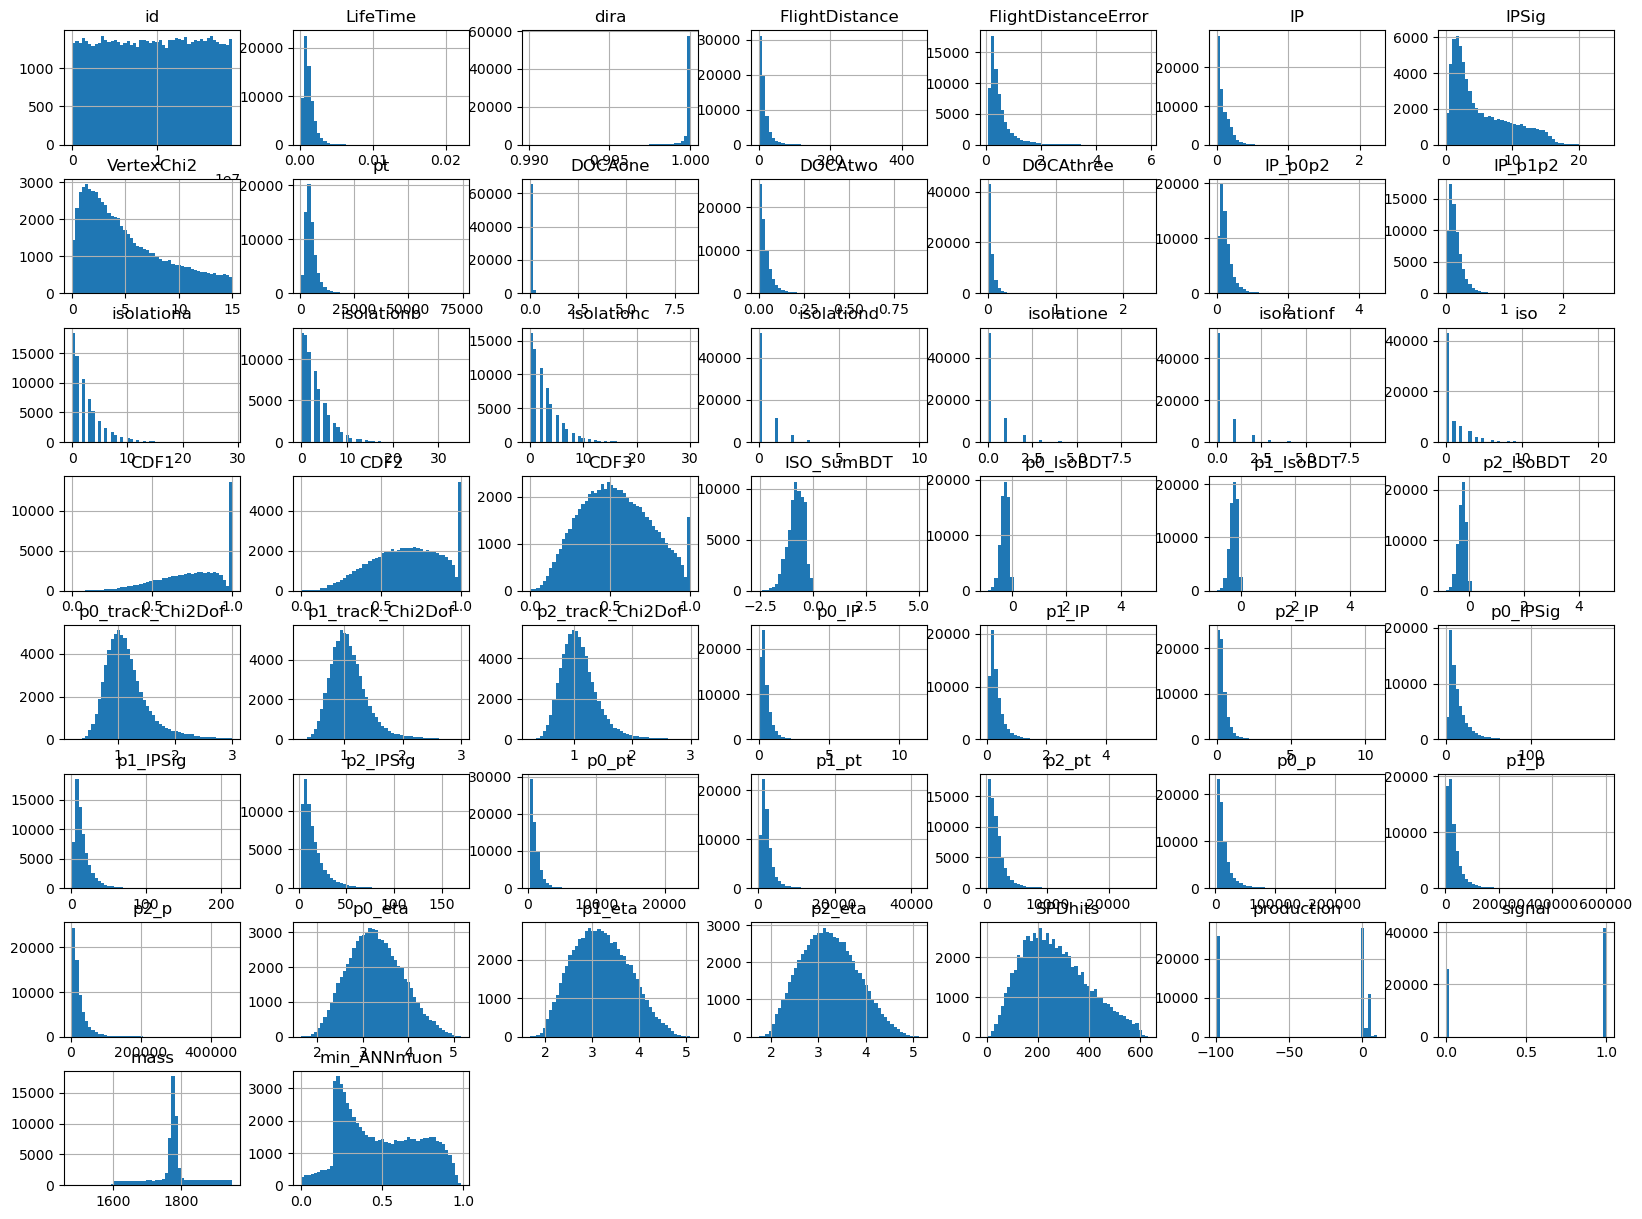

In [19]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
train.describe()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
count,6.755300e+04,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,6.755300e+04,...,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000
mean,9.410285e+06,0.001255,0.999846,15.153986,0.501794,0.090363,5.305426,5.132504,5027.967460,4.496067e-02,...,33050.376570,24407.169131,3.280283,3.197816,3.233437,269.119832,-36.657765,0.616908,1779.389403,0.488508
std,5.420202e+06,0.000779,0.000540,15.060723,0.426345,0.085216,4.331420,3.849261,3010.766079,6.052672e-02,...,30190.555855,25076.484396,0.592017,0.592466,0.588628,127.446169,49.145483,0.486144,66.956336,0.238141
min,9.400000e+01,0.000144,0.990090,0.804510,0.075224,0.000264,0.020823,0.001895,314.100067,9.142349e-08,...,3052.763672,3008.329102,1.638945,1.673761,1.746441,5.000000,-99.000000,0.000000,1480.453491,0.000177
25%,4.703278e+06,0.000725,0.999916,6.225103,0.236352,0.027773,1.830687,1.995162,3157.041748,1.298088e-02,...,14357.550781,9325.879883,2.848309,2.746091,2.792214,171.000000,-99.000000,0.000000,1766.956787,0.277863
50%,9.439761e+06,0.001061,0.999985,10.604475,0.366318,0.058136,3.628297,4.116704,4366.348145,2.912052e-02,...,23996.681641,16510.722656,3.249017,3.166046,3.205477,254.000000,1.000000,1.000000,1777.976562,0.455296
75%,1.411261e+07,0.001559,0.999997,18.554255,0.598817,0.134010,8.221298,7.598480,6079.195801,5.754587e-02,...,40976.976562,30108.750000,3.688323,3.623785,3.647688,354.000000,1.000000,1.000000,1789.937622,0.695368
max,1.877274e+07,0.022134,1.000000,449.242554,5.878616,2.245918,24.074131,14.998641,74390.289062,8.312201e+00,...,602064.750000,461608.593750,5.164036,5.090231,5.124544,632.000000,10.000000,1.000000,1949.984009,0.985871


## Que son los atributos? 

| Variable	| Definition |
| --- | --- |
| $\tau$ | --- |
| FlightDistance | Distance between τ and PV  |
| FlightDistanceError | Error on FlightDistance | | 
| mass | τ candidate invariant mass  | 
| LifeTime | Life time of tau candidate  |
| IP | Impact Parameter of tau candidate  |
| IPSig | **Significance of Impact Parameter**  |
| VertexChi2 | **χ2 of tau vertex**  |
| dira | **Cosine of the angle between the τ momentum and line between PV and tau vertex** |
| pt | transverse momentum of tau  | 
| Decay 3 $\mu$  |   |
| DOCAone - Distance of Closest Approach between p0 and p1  | | 
| IP p0p2 - Impact parameter of the p0 and p2 pair (3)| |  
| iso - Track isolation variable | |
| CDF1 - Cone isolation variable (3) | |
| ISO SumBDT - Track isolation variable | |
| p1 IsoBDT - Track isolation variable (3) | |
| p0 track Chi2Dof - Quality of p0 muon track (3) | |
| p0 pt | Transverse momentum of p0 muon (3)  | 
| p0 p | Momentum of p0 muon (3)  |
| p0 eta | Pseudorapidity of p0 muon  | 
| p0 IP - Impact parameter of p0 muon (3)| |
| p0 IPSig - Impact Parameter Significance of p0 muon (3)| |
| SPDhits- Number of hits in the SPD detector | |

## Señal y background

Señal: $\tau^- \rightarrow \mu^- \mu^-\mu^+$ 

Background 1: $D_s \rightarrow \eta (\mu^-\mu^+\gamma)\mu^-\nu_{\mu}$ 

Background 2: $D^+ \rightarrow K^-\pi^+\pi^+$ 

|   |    |
|---| ---|
| $m_{\tau}$ | 1776.86 MeV/c²|
| $m_{\mu}$  | 105.66 MeV/c²) |
| $m_{K\pm}$ |  493.68 MeV/c²|
| $m_{\pi\pm}$ | 139.57 MeV/c² |
|   | |


In [42]:
#This is a labelled dataset (the label ‘signal’ being ‘1’ for signal events, ‘0’ for background events) 
# to train the classifier. Signal events have been simulated, while background events are real data.

señal = train[(train["signal"]==1)]
background = train[(train["signal"]==0)]
print("Señal=",señal.shape[0])
print("Background=",background.shape[0])

Señal= 41674
Background= 25879


## Leptón $\tau$

<AxesSubplot: xlabel='VertexChi2', ylabel='Count'>

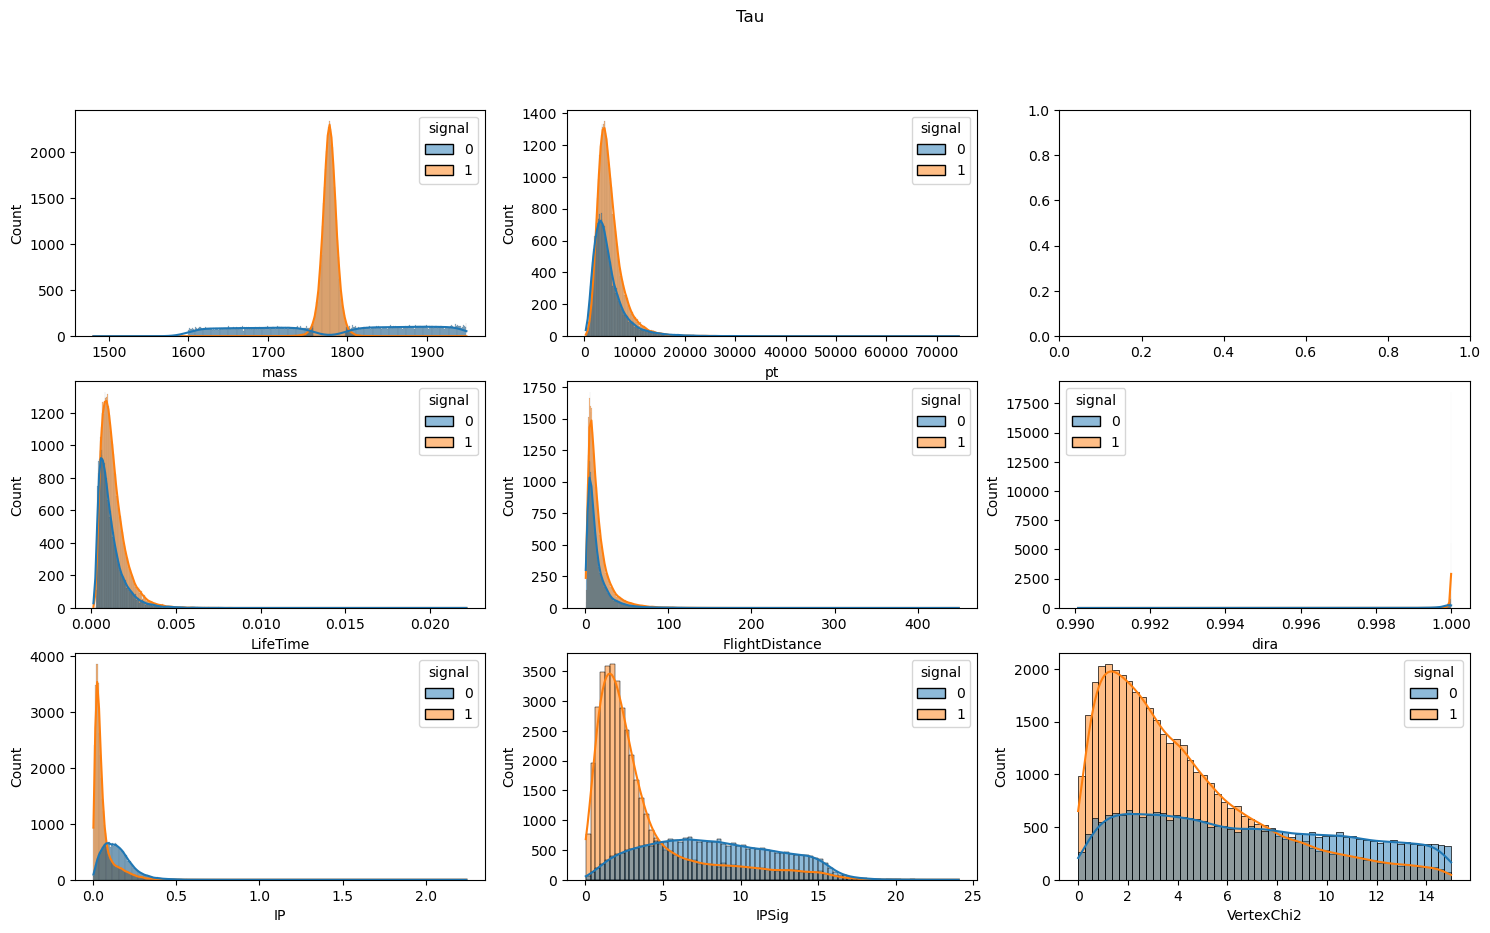

In [22]:

fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Tau')
sns.histplot(data=train, x="mass",kde=True, hue = "signal", ax=axs[0, 0])
sns.histplot(data=train, x="pt",kde=True, hue = "signal", ax=axs[0, 1])
sns.histplot(data=train, x="LifeTime",kde=True, hue = "signal", ax=axs[1, 0])
sns.histplot(data=train, x="FlightDistance",kde=True, hue = "signal", ax=axs[1, 1])
sns.histplot(data=train, x="dira",kde=True, hue = "signal", ax=axs[1, 2] )
sns.histplot(data=train, x="IP",kde=True, hue = "signal", ax=axs[2, 0])
sns.histplot(data=train, x="IPSig",kde=True, hue = "signal", ax=axs[2, 1])
sns.histplot(data=train, x="VertexChi2",kde=True, hue = "signal", ax=axs[2, 2])


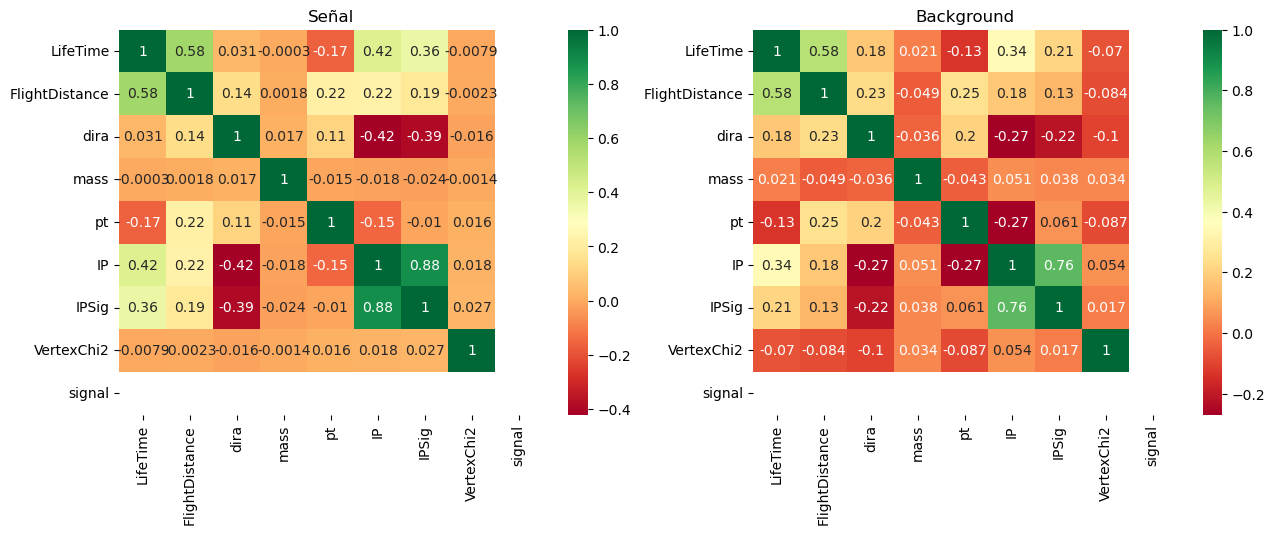

In [41]:
subset_tau_señal = señal[["LifeTime", "FlightDistance", "dira", "mass" , "pt" , "IP", "IPSig" , "VertexChi2","signal" ]]
subset_tau_background = background[["LifeTime", "FlightDistance", "dira", "mass" , "pt" , "IP", "IPSig" , "VertexChi2","signal" ]]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Señal")
train_corr(subset_tau_señal)
plt.subplot(1,2,2)
plt.title("Background")
train_corr(subset_tau_background)

## 3 muons

<AxesSubplot: xlabel='p2_eta', ylabel='Count'>

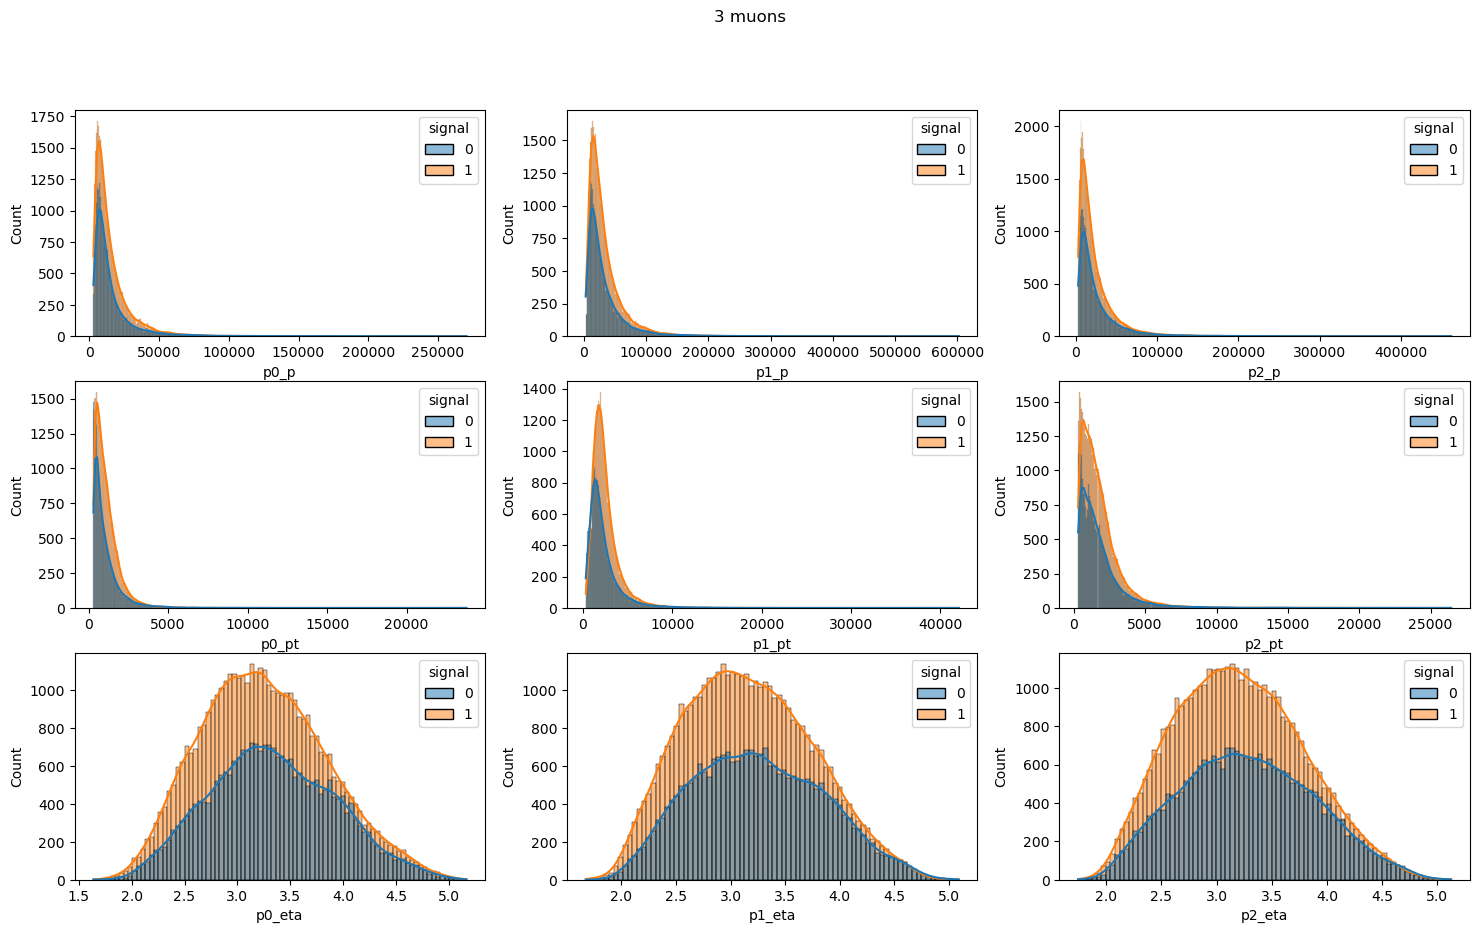

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('3 muons')
sns.histplot(data=train, x="p0_p",kde=True, hue = "signal", ax=axs[0, 0])
sns.histplot(data=train, x="p1_p",kde=True, hue = "signal", ax=axs[0, 1])
sns.histplot(data=train, x="p2_p",kde=True, hue = "signal", ax=axs[0, 2])
sns.histplot(data=train, x="p0_pt",kde=True, hue = "signal", ax=axs[1, 0])
sns.histplot(data=train, x="p1_pt",kde=True, hue = "signal", ax=axs[1, 1] )
sns.histplot(data=train, x="p2_pt",kde=True, hue = "signal", ax=axs[1, 2])
sns.histplot(data=train, x="p0_eta",kde=True, hue = "signal", ax=axs[2, 0])
sns.histplot(data=train, x="p1_eta",kde=True, hue = "signal", ax=axs[2, 1])
sns.histplot(data=train, x="p2_eta",kde=True, hue = "signal", ax=axs[2, 2])

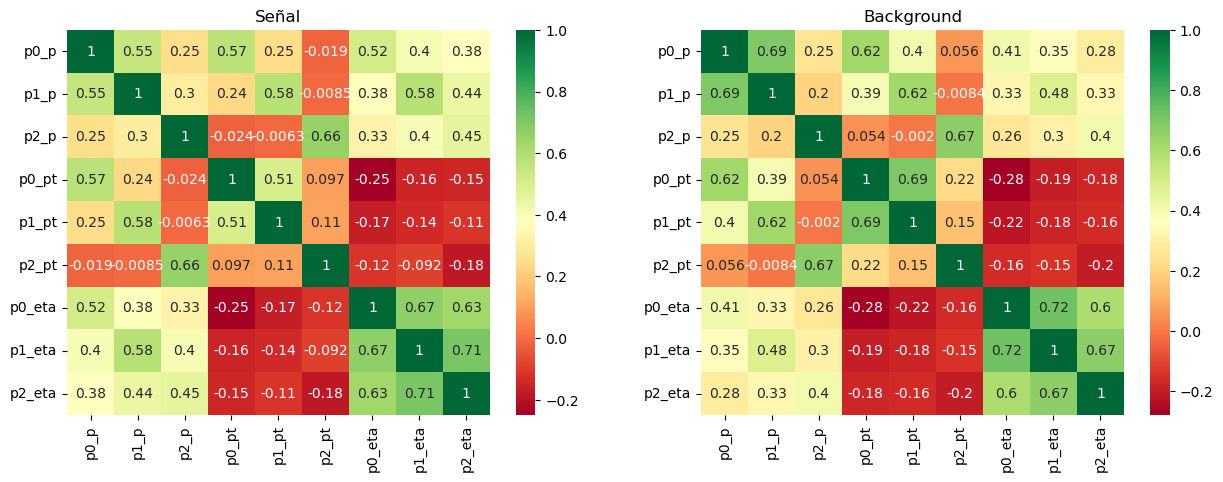

In [40]:
subset_mu_señal = señal[["p0_p", "p1_p", "p2_p", "p0_pt" , "p1_pt" , "p2_pt", "p0_eta" , "p1_eta","p2_eta" ]]
subset_mu_background = background[["p0_p", "p1_p", "p2_p", "p0_pt" , "p1_pt" , "p2_pt", "p0_eta" , "p1_eta","p2_eta" ]]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Señal")
train_corr(subset_mu_señal)
plt.subplot(1,2,2)
plt.title("Background")
train_corr(subset_mu_background)